# Feature Selection

Um "label" (ou rótulo) é a variável que estamos prevendo, enquanto que uma "feature" (atributo) é a variável de entrada, podendo ser mais de uma. Deve ser feita depois da etapa de pré-processamento dos dados. O objetivo é selecionar as melhores variáveis como possíveis variáveis preditoras. Essa etapa ajuda a reduzir o overfitting, aumenta a acurácia do modelo e reduz o tempo de treinamento.

### Tipos de Algoritmos e Métodos

<ul>
    <li><b>Filter Methods</b>: Métodos de seleção que utiliza medidas estatísticas para atribuir um score para cada feature. As features são classificadas pelo score para serem mantidas ou removidas do modelo. Normalmente se usam testes univariados que consideram a independência da feature com a variável alvo. Exemplo: chi squared, scores com coeficiente de correlação.</li>
    <li><b>Wrapper Methods</b>: Métodos de seleção que selecionam um conjunto de features, onde diferentes combinações são preparadas, avaliadas e comparadas. Um modelo preditivo é usado para avaliar a combinação de features a atribuir um score baseado em uma acurácia de modelo. Exemplo: algoritmo RFE.</li>
    <li><b>Embedded Methods</b>: Métodos Embedded aprendem quais feature melhor contribuiem para a acurácia do modelo no momento de construção do modelo. Exemplo: métodos de penalização, algoritmos Lasso, Elastic NEt e Ridge Regression.</li>
</ul>

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [11]:
colnames = ['gest', 'glic', 'sang', 'skin', 'insul', 'mass', 'familia', 'idade', 'conf']

# Lendo o arquivo:
df = pd.read_csv('../bases/pima-indians-diabetes.csv', names=colnames)
df.head(5) # tail(5)

,gest,glic,sang,skin,insul,mass,familia,idade,conf
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Informações do conjunto de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gest     768 non-null    int64  
 1   glic     768 non-null    int64  
 2   sang     768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insul    768 non-null    int64  
 5   mass     768 non-null    float64
 6   familia  768 non-null    float64
 7   idade    768 non-null    int64  
 8   conf     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Separação dos Dados
X = df.drop(['conf'], axis=1)
y = df['conf']

## 1. Coeficientes de Correlação

In [14]:
f_classif1 = SelectKBest(score_func=f_classif, k=4)
fit1 = f_classif1.fit(X,y)

Os tipos são:
<ul>
    <li><b>f_classif</b>: sendo o mais adequado quando os dados são numéricos e a variável alvo é categórica.</li>
    <li><b>mutual_info_classif</b>: é mais adequando quando não há uma dependência linear entre os atributos e a variável alvo.</li>
    <li><b>f_regression</b>: para problemas de regressão.</li>
</ul>    

In [15]:
# Mostrar de forma mais clara para descobrir quais são essas características.
cols = fit1.get_support(indices=True)
df.iloc[:,cols]

,gest,glic,mass,idade
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


## 2. Aplicar o chi2

Medir a dependência entre variáveis estocásticas, o uso dessa função “elimina” os recursos com maior probabilidade de serem independentes da classe e, portanto, irrelevantes para a classificação.

In [16]:
# Utilizar o método Chi2
test2 = SelectKBest(chi2, k=4)
fit2 = test2.fit(X, y)

In [17]:
# Mostrar de forma mais clara para descobrir quais são essas características.
cols = fit2.get_support(indices=True)
df.iloc[:,cols]

,glic,insul,mass,idade
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


## 3. Wrapper Methods - RFE - Recursive Feature Elimination

Remover recursivamente os atributos e construir o modelo com os atributos remanescentes, ou seja, os modelos são construídos a partir da remoção de features.

In [18]:
# É necessário informar ao RFE o número de atributos caso contrário ele tentará reduzir pela metade esse valor de acordo com o número de features do conjunto de dados.
model = LogisticRegression(max_iter=2000, solver='lbfgs')
rfe = RFE(model, n_features_to_select=4)
fit3 = rfe.fit(X, y)

In [19]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit3.n_features_))

Número de features: 4


In [20]:
# Visualizar os índices:
cols = fit3.get_support(indices=True)
df.iloc[:,cols]

,gest,glic,mass,familia
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288
...,...,...,...,...
763,10,101,32.9,0.171
764,2,122,36.8,0.340
765,5,121,26.2,0.245
766,1,126,30.1,0.349


## 4. Aplicar o Feature Importance

Métodos ensembles como o algoritmo Random Forest, podem ser usados para estimar a importância de cada atributo. Retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
# RandomForestClassifier(bootstrap=True, class_weight=None,
#                       criterion='gini', max_depth=None, max_features='auto',
#                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=10,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False)

RandomForestClassifier()

In [28]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.08991114 0.26227665 0.09253095 0.06654108 0.06995718 0.15683144
 0.12410697 0.1378446 ]


In [23]:
# Identificação das colunas:
colnames

['gest', 'glic', 'sang', 'skin', 'insul', 'mass', 'familia', 'idade', 'conf']

In [29]:
# Gerar uma melhor visualização:
feature_importancia = pd.DataFrame(model.feature_importances_,
  index = X.columns, columns=['importancia']).sort_values('importancia', ascending=False)
feature_importancia

,importancia
glic,0.262277
mass,0.156831
idade,0.137845
familia,0.124107
sang,0.092531
gest,0.089911
insul,0.069957
skin,0.066541


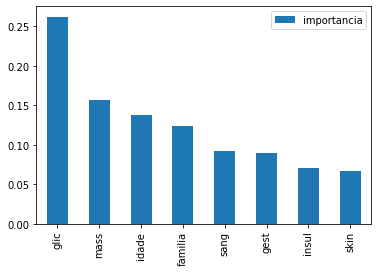

In [30]:
# Ou de forma gráfica
feature_importancia.plot(kind='bar')

## Qual Método utilizar?

<ul>
<li>Usar o RFE caso tenha recursos computacionais para isso.</li>
<li>Se estiver trabalhando com Classificação e as features forem numéricas utilizar f_classif ou mutual_info_classif.</li>
<li>Se estiver trabalhando com Regressão e as features forem numéricas utilizar f_regression ou mutual_info_regression.</li>
<li>Caso esteja trabalhando com features categóricas utilizar chi2</li>
</ul>